In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
data_dir = '/content/drive/My Drive/Dataset/corn'
train_dir = os.path.join(data_dir, 'train')
validation_dir = os.path.join(data_dir, 'validation')
test_dir = os.path.join(data_dir, 'test')

In [6]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [7]:
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 10831 images belonging to 4 classes.
Found 210 images belonging to 4 classes.


In [8]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(4, activation='softmax')
])

In [9]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=1,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

339/339 [==============================] - 3199s 9s/step - loss: 0.4342 - accuracy: 0.8137 - val_loss: 0.2959 - val_accuracy: 0.8952


In [11]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 1328 images belonging to 4 classes.


In [12]:
test_loss, test_acc = model.evaluate(test_generator, steps=len(test_generator))
print("Test accuracy:", test_acc)

42/42 [==============================] - 344s 8s/step - loss: 0.2747 - accuracy: 0.8946
Test accuracy: 0.8945783376693726


In [13]:
import numpy as np
test_predictions = model.predict(test_generator, steps=len(test_generator))
test_labels = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

print(classification_report(test_labels, np.argmax(test_predictions, axis=-1), target_names=class_labels))


42/42 [==============================] - 22s 521ms/step
                                     precision    recall  f1-score   support

Cercospora_leaf_spot Gray_leaf_spot       0.07      0.02      0.03       138
                        Common_rust       0.31      0.31      0.31       366
               Northern_Leaf_Blight       0.39      0.45      0.42       486
                            healthy       0.25      0.27      0.26       338

                           accuracy                           0.32      1328
                          macro avg       0.26      0.26      0.26      1328
                       weighted avg       0.30      0.32      0.31      1328



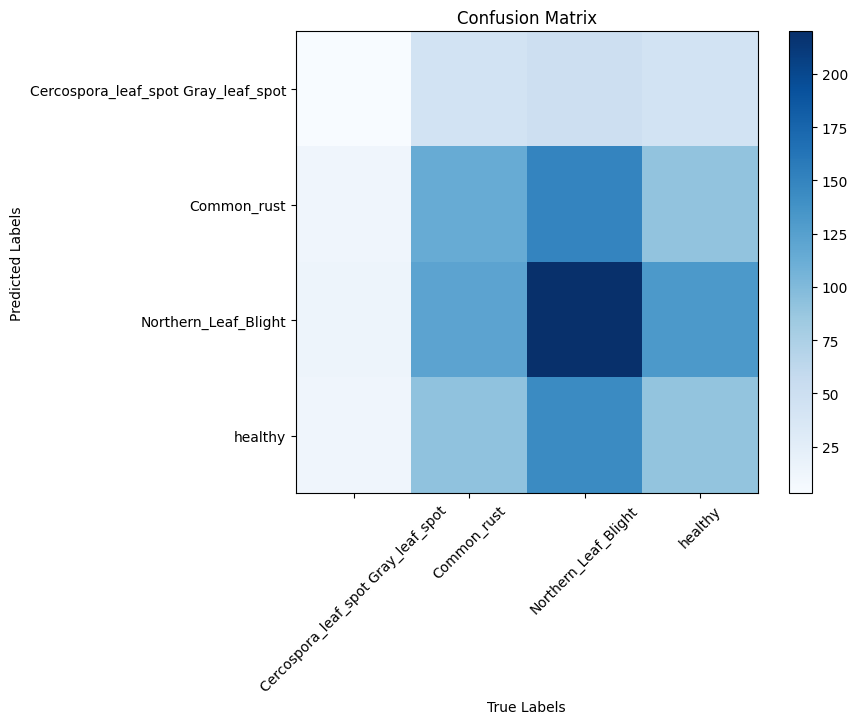

In [14]:
confusion_mtx = confusion_matrix(test_labels, np.argmax(test_predictions, axis=-1))
plt.figure(figsize=(8, 6))
plt.imshow(confusion_mtx, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(np.arange(len(class_labels)), class_labels, rotation=45)
plt.yticks(np.arange(len(class_labels)), class_labels)
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.show()

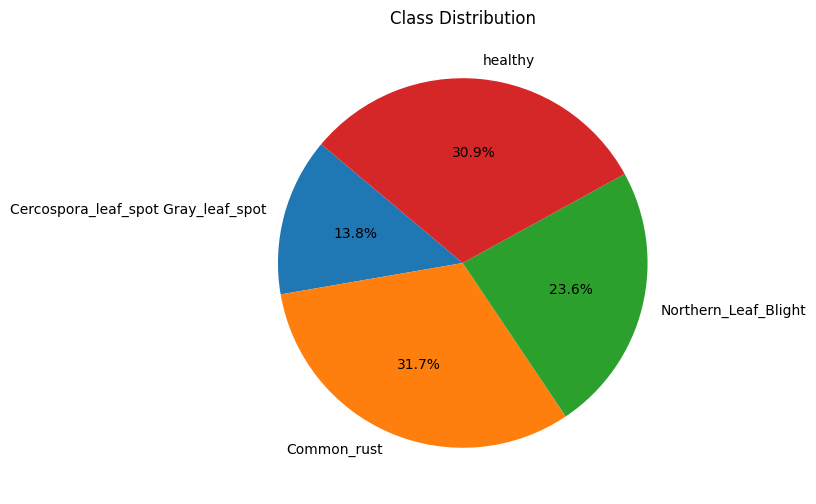

In [15]:
class_counts = train_generator.labels
unique, counts = np.unique(class_counts, return_counts=True)

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=class_labels, autopct='%1.1f%%', startangle=140)
plt.title('Class Distribution')
plt.show()

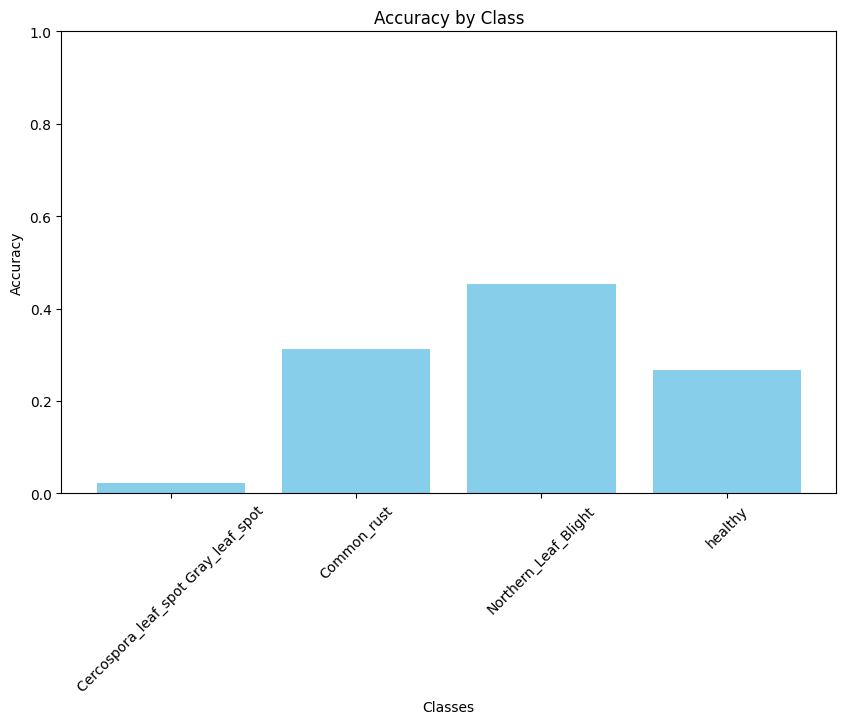

In [16]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy for each class
class_accuracies = []
for i in range(len(class_labels)):
    class_indices = np.where(test_labels == i)[0]
    class_predictions = np.argmax(test_predictions[class_indices], axis=-1)
    class_true_labels = test_labels[class_indices]
    class_accuracy = accuracy_score(class_true_labels, class_predictions)
    class_accuracies.append(class_accuracy)

# Create a bar chart of class accuracies
plt.figure(figsize=(10, 6))
plt.bar(class_labels, class_accuracies, color='skyblue')
plt.title('Accuracy by Class')
plt.xlabel('Classes')
plt.ylabel('Accuracy')
plt.ylim([0, 1.0])
plt.xticks(rotation=45)
plt.show()

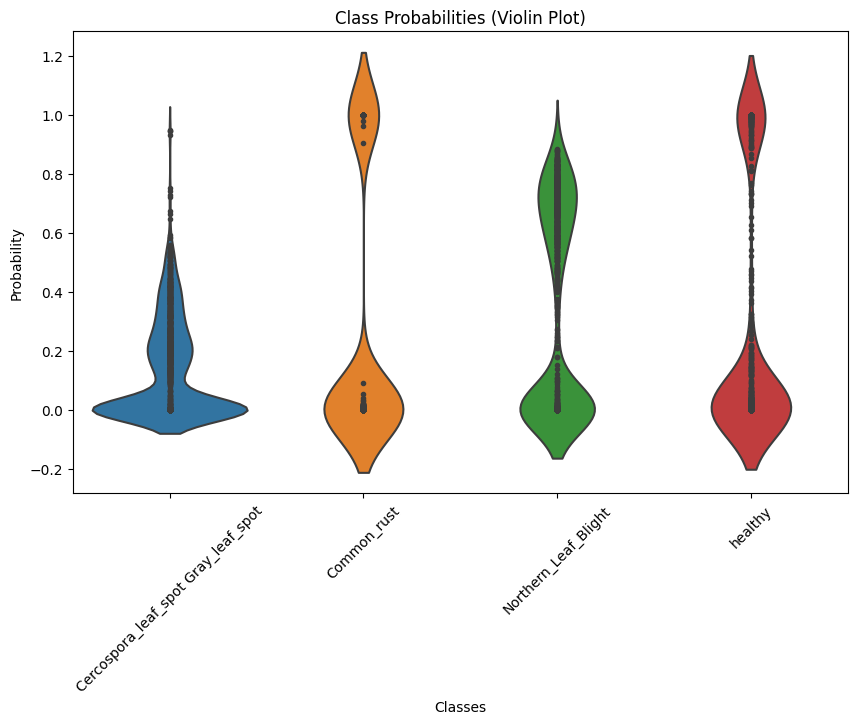

In [17]:
import seaborn as sns

# Calculate the predicted probabilities for each class
class_probabilities = test_predictions

# Create a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=class_probabilities, inner="points")
plt.title('Class Probabilities (Violin Plot)')
plt.xlabel('Classes')
plt.ylabel('Probability')
plt.xticks(np.arange(len(class_labels)), class_labels, rotation=45)
plt.show()


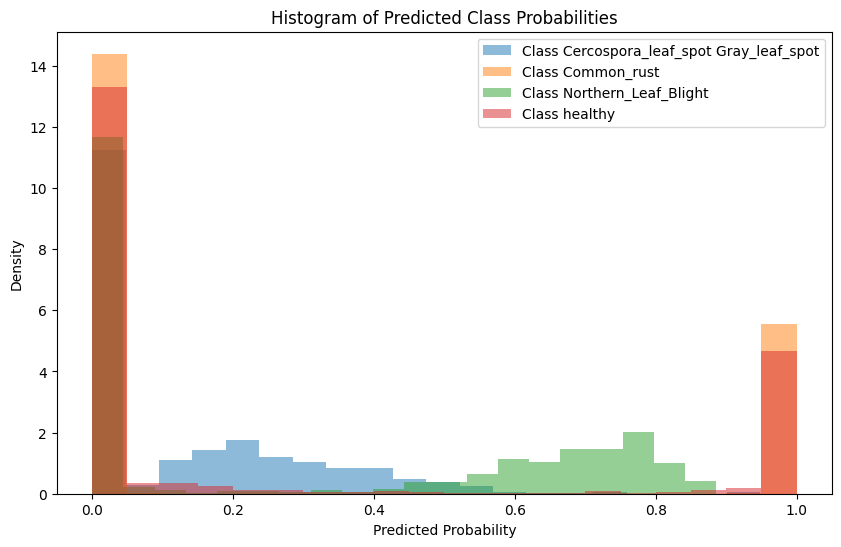

In [18]:
# histogram of predicted class probabilities
plt.figure(figsize=(10, 6))
for i in range(len(class_labels)):
    plt.hist(test_predictions[:, i], bins=20, alpha=0.5, label=f'Class {class_labels[i]}', density=True)

plt.xlabel('Predicted Probability')
plt.ylabel('Density')
plt.title('Histogram of Predicted Class Probabilities')
plt.legend()
plt.show()

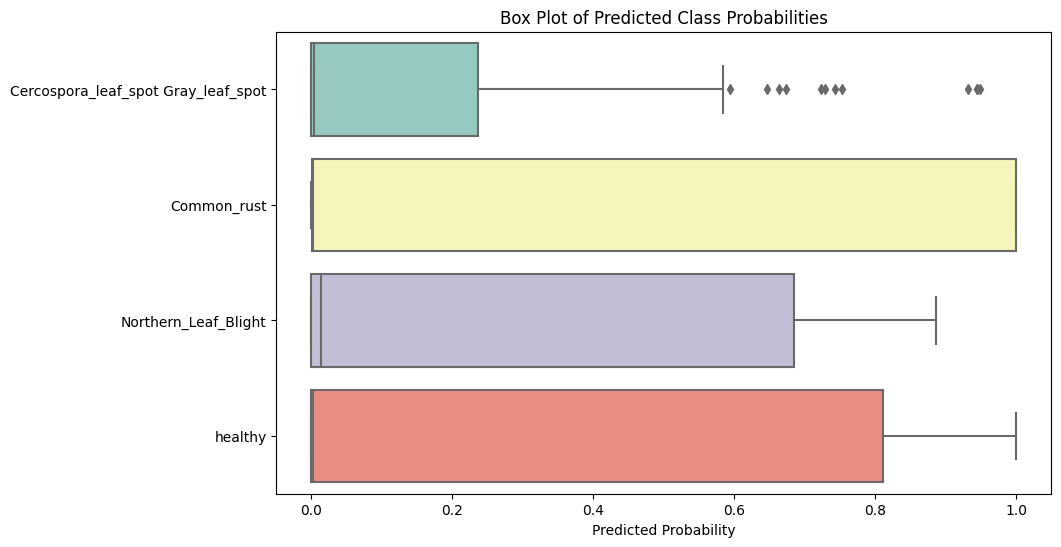

In [19]:
#box plot of predicted class probabilities
plt.figure(figsize=(10, 6))
sns.boxplot(data=test_predictions, orient='h', palette='Set3')
plt.title('Box Plot of Predicted Class Probabilities')
plt.xlabel('Predicted Probability')
plt.yticks(np.arange(len(class_labels)), class_labels)
plt.show()

In [20]:
pip install plotly

In [21]:
import plotly.express as px

import pandas as pd
df = pd.DataFrame(test_predictions, columns=class_labels)

# 3D scatter plot
fig = px.scatter_3d(df, x=class_labels[0], y=class_labels[1], z=class_labels[2],
                    color=class_labels[3], opacity=0.7, size_max=10)
fig.update_layout(scene=dict(xaxis_title=class_labels[0], yaxis_title=class_labels[1],
                             zaxis_title=class_labels[2]))
fig.show()

In [22]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(z=test_predictions.T)])
fig.update_layout(scene=dict(zaxis_title='Predicted Probability'))
fig.show()


In [24]:
model.save('/content/drive/My Drive/Dataset/model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



Saving RS_Rust 1804_90degFlipLR.JPG to RS_Rust 1804_90degFlipLR (2).JPG


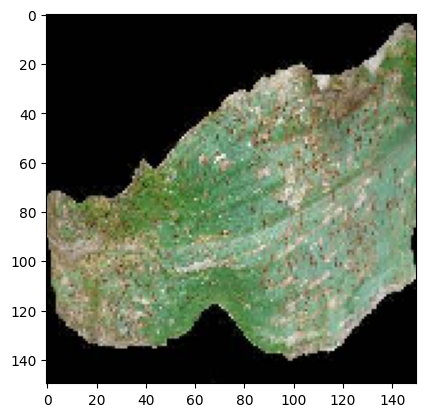

1/1 [==============================] - 0s 53ms/step
[0. 1. 0. 0.]
Predicted disease: Common_rust
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                         

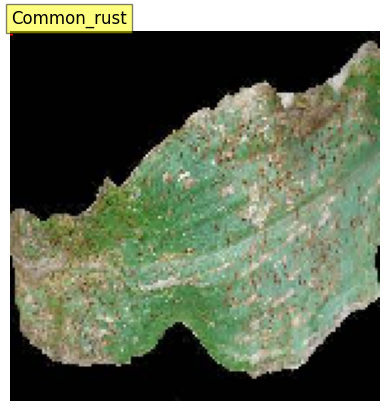

In [26]:
import matplotlib.patches as patches

# Upload image
uploaded = files.upload()

for fn in uploaded.keys():
  # Assuming a single image is uploaded
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  plt.imshow(img)  # Display the original image
  plt.show()

  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])  # Print predicted probabilities for each class
  predicted_label = class_labels[np.argmax(classes[0])]
  print("Predicted disease:", predicted_label)

  # Print model summary
  model.summary()

  # Visualize model parameters (optional)
  from keras.utils import plot_model
  plot_model(model, to_file='model_visualization.png', show_shapes=True, show_layer_names=True)

# Predict and visualize bounding boxes:
y_pred = model.predict(images)
predicted_disease = class_labels[np.argmax(y_pred[0])]
print("Predicted disease:", predicted_disease)

# Assuming your model outputs bounding box coordinates (x1, y1, x2, y2)
bounding_box = y_pred[0][-4:]  # Extract bounding box coordinates

# Create the plot
fig, ax = plt.subplots()
ax.imshow(img)

# Create a bounding box rectangle
rect = patches.Rectangle((bounding_box[0], bounding_box[1]),
                          bounding_box[2] - bounding_box[0],
                          bounding_box[3] - bounding_box[1],
                          linewidth=2, edgecolor='r', facecolor='none')

# Add the bounding box to the plot
ax.add_patch(rect)

# Label the bounding box with the predicted disease
ax.text(bounding_box[0], bounding_box[1] - 5, predicted_disease,
        bbox=dict(facecolor='yellow', alpha=0.5), fontsize=12)

plt.axis('off')  # Turn off axis labels
plt.show()


Saving ff619f22-b7a3-422f-a410-6c7b244738f2___RS_GLSp 4615_FlipTB.JPG to ff619f22-b7a3-422f-a410-6c7b244738f2___RS_GLSp 4615_FlipTB.JPG


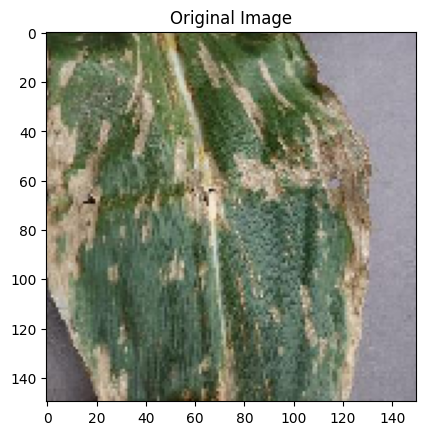

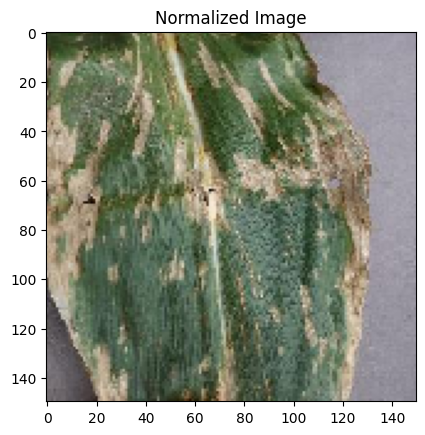

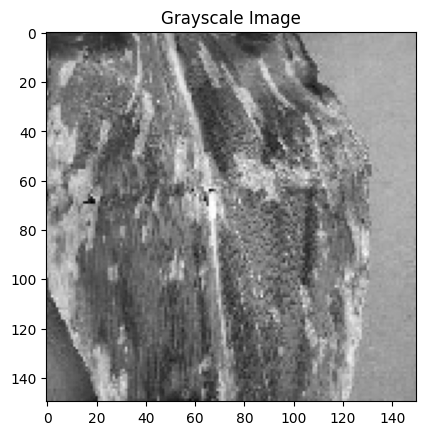

GLCM Features:
Contrast: [708.69668904]
Dissimilarity: [18.48702461]
Homogeneity: [0.08842314]
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                           

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation:

Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation:

Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation:

Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation:

Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.



1/1 [==============================] - 0s 60ms/step


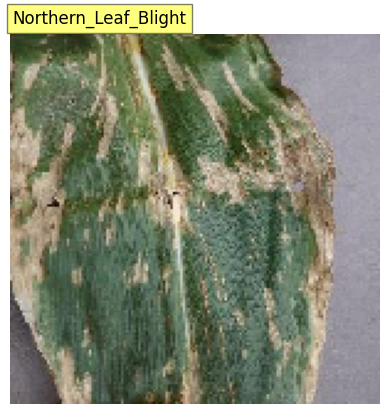

In [30]:
from skimage import io
from skimage.color import rgb2gray
from skimage.feature import greycomatrix, greycoprops
import matplotlib.pyplot as plt

# Upload image
uploaded = files.upload()

for fn in uploaded.keys():
    # Assuming a single image is uploaded
    path = fn
    img = image.load_img(path, target_size=(150, 150))
    plt.imshow(img)  # Display the original image
    plt.title('Original Image')
    plt.show()

    # Convert the image to a numpy array
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    # Normalize the image
    x /= 255.0

    # Display normalized image
    plt.imshow(x[0])
    plt.title('Normalized Image')
    plt.show()

    # Convert to grayscale
    gray_img = rgb2gray(x[0])
    plt.imshow(gray_img, cmap='gray')
    plt.title('Grayscale Image')
    plt.show()

    # GLCM Feature Extraction
    glcm = greycomatrix((gray_img * 255).astype('uint8'), [1], [0],  symmetric=True, normed=True)
    contrast = greycoprops(glcm, 'contrast')[0]
    dissimilarity = greycoprops(glcm, 'dissimilarity')[0]
    homogeneity = greycoprops(glcm, 'homogeneity')[0]

    # Display GLCM features
    print("GLCM Features:")
    print("Contrast:", contrast)
    print("Dissimilarity:", dissimilarity)
    print("Homogeneity:", homogeneity)


    # Display model summary
    model.summary()

    # Visualize model parameters (optional)
    from keras.utils import plot_model
    plot_model(model, to_file='model_visualization.png', show_shapes=True, show_layer_names=True)

    # Predict and visualize bounding boxes (if applicable)
    y_pred = model.predict(x)
    predicted_disease = class_labels[np.argmax(y_pred[0])]

    # Assuming your model outputs bounding box coordinates (x1, y1, x2, y2)
    bounding_box = y_pred[0][-4:]

    # Create the plot
    fig, ax = plt.subplots()
    ax.imshow(x[0])

    # Create a bounding box rectangle
    rect = patches.Rectangle((bounding_box[0], bounding_box[1]),
                              bounding_box[2] - bounding_box[0],
                              bounding_box[3] - bounding_box[1],
                              linewidth=2, edgecolor='r', facecolor='none')

    # Add the bounding box to the plot
    ax.add_patch(rect)

    # Label the bounding box with the predicted disease
    ax.text(bounding_box[0], bounding_box[1] - 5, predicted_disease,
            bbox=dict(facecolor='yellow', alpha=0.5), fontsize=12)

    plt.axis('off')  # Turn off axis labels
    plt.show()

